GIT HUB LINK https://github.com/kaartav

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:


# Define the file ID
file_id = '1rw88cUpY6dWawP0RV-22MXreFm7QDT5H'

# Construct the download link
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
df = pd.read_csv(url)

# Display the DataFrame
print(df)


      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.97237   
1               Manhattan             Midtown  40.75362  -73.98377   
2               Manhattan              Harlem  40.80902  -73.94190   
3                Brooklyn        Clinton Hill  40.68514  -73.95976   
4               Manhattan         East Harlem  40.79851  -73.94399   
...                   ...                 ...       ...        ...   
48890            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891            Brooklyn            Bushwick  40.70184  -73.93317   
48892           Manhattan              Harlem  40.81475  -73.94867   
48893           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894           Manhattan      Hell's Kitchen  40.76404  -73.98933   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   

In [3]:
# Use isnull() to get a DataFrame of True/False values where True indicates a missing value
missing_values = df.isnull()

# Use sum() to get the sum of missing values in each column
missing_values_sum = missing_values.sum()

print(missing_values_sum)

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [4]:

df["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [5]:
# Replace entries other than 'Williamsburg' or 'Bedford-Stuyvesant'or Harlem or Bushwick or Upper West Side or East Village,etc  with 'others'
df['neighbourhood'] = np.where(df['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side',"Hell's Kitchen",'East Village','Upper East Side','Crown Heights','Midtown']), df['neighbourhood'], 'others')

In [6]:
#one hot encoding for catogorical variables


cat_columns = ["neighbourhood_group","room_type","neighbourhood"]
df = pd.get_dummies(df, columns = cat_columns)
df

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Bushwick,neighbourhood_Crown Heights,neighbourhood_East Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Midtown,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Williamsburg,neighbourhood_others
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,...,0,0,0,0,0,0,0,0,0,1
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,...,0,0,0,0,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,...,0,0,0,1,0,0,0,0,0,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,...,0,0,0,0,0,0,0,0,0,1
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,NaN,2,9,0,...,0,0,0,0,0,0,0,0,0,0
48891,40.70184,-73.93317,40,4,0,NaN,NaN,2,36,0,...,1,0,0,0,0,0,0,0,0,0
48892,40.81475,-73.94867,115,10,0,NaN,NaN,1,27,0,...,0,0,0,1,0,0,0,0,0,0
48893,40.75751,-73.99112,55,1,0,NaN,NaN,6,2,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#using a simple imputer to fill in for missing values

from sklearn.impute import SimpleImputer

#creating imputer and fitting it to applicable columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numerical_columns = ["price","minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
imputer.fit(df[numerical_columns])

#transforming data
imputed_data = imputer.transform(df[numerical_columns])
imputed_data

#updating df
df[numerical_columns] = imputed_data

df

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,...,neighbourhood_Bushwick,neighbourhood_Crown Heights,neighbourhood_East Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Midtown,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Williamsburg,neighbourhood_others
0,40.64749,-73.97237,149.0,1.0,9.0,2018-10-19,0.210000,6.0,365.0,0,...,0,0,0,0,0,0,0,0,0,1
1,40.75362,-73.98377,225.0,1.0,45.0,2019-05-21,0.380000,2.0,355.0,0,...,0,0,0,0,0,1,0,0,0,0
2,40.80902,-73.94190,150.0,3.0,0.0,NaN,1.373221,1.0,365.0,0,...,0,0,0,1,0,0,0,0,0,0
3,40.68514,-73.95976,89.0,1.0,270.0,2019-07-05,4.640000,1.0,194.0,0,...,0,0,0,0,0,0,0,0,0,1
4,40.79851,-73.94399,80.0,10.0,9.0,2018-11-19,0.100000,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2.0,0.0,NaN,1.373221,2.0,9.0,0,...,0,0,0,0,0,0,0,0,0,0
48891,40.70184,-73.93317,40.0,4.0,0.0,NaN,1.373221,2.0,36.0,0,...,1,0,0,0,0,0,0,0,0,0
48892,40.81475,-73.94867,115.0,10.0,0.0,NaN,1.373221,1.0,27.0,0,...,0,0,0,1,0,0,0,0,0,0
48893,40.75751,-73.99112,55.0,1.0,0.0,NaN,1.373221,6.0,2.0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df = df.drop("last_review", axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#columns to normalize
columns_to_normalize = ["latitude", "longitude", "price","minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

# Create a StandardScaler object
scaler = StandardScaler()
scaler1=MinMaxScaler()

#fitting and transforming data
normalized_data = scaler.fit_transform(df[columns_to_normalize])

#replacing values
df[columns_to_normalize] = normalized_data

df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Bushwick,neighbourhood_Crown Heights,neighbourhood_East Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Midtown,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Williamsburg,neighbourhood_others
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,0.000000,-0.186451,1.916250,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.181110,-0.186451,0.617065,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,0.000000,-0.156104,-0.788486,0,1,...,0,0,0,0,0,0,0,0,0,0
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,0.000000,-0.156104,-0.583352,0,1,...,1,0,0,0,0,0,0,0,0,0
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,0.000000,-0.186451,-0.651730,0,0,...,0,0,0,1,0,0,0,0,0,0
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,0.000000,-0.034716,-0.841669,0,0,...,0,0,0,0,1,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

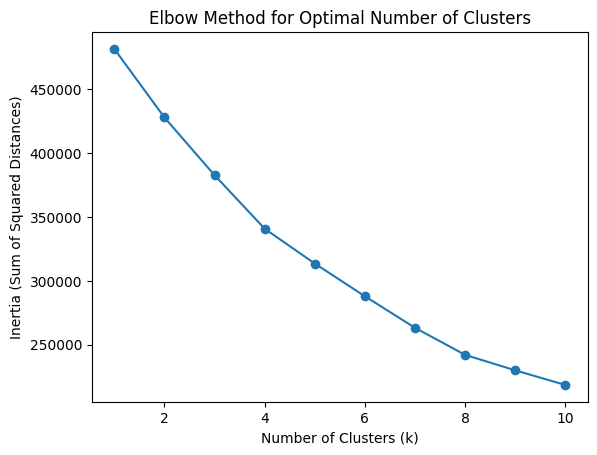

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def calculate_inertia(data, centroids, clusters):
    # Calculate the sum of squared distances from each point to its assigned centroid
    distances = pairwise_distances_argmin_min(data, centroids)[1]
    return np.sum(distances ** 2)

def elbow_method(data, max_clusters=10):
    # Run k-means for different values of k and calculate inertia
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(calculate_inertia(data, kmeans.cluster_centers_, kmeans.labels_))

    return inertias

# Calculate inertias for different values of k
max_clusters = 10
inertias = elbow_method(df, max_clusters)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


In [11]:
# K-means clustering from scratch

def initialize_centroids(data, k):
    # Randomly select k data points as initial centroids
    centroids_indices = np.random.choice(len(data), k, replace=False)
    centroids = data.iloc[centroids_indices].values
    return centroids

def assign_to_clusters(data, centroids):
    # Assign each data point to the cluster whose centroid is nearest
    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    # Calculate new centroids as the mean of all data points assigned to that cluster
    centroids = np.zeros((k, data.shape[1]))
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        if len(cluster_points) > 0:
            centroids[cluster_id] = np.mean(cluster_points, axis=0)
    return centroids

def has_converged(new_clusters, old_clusters):
    # Check if the assignments no longer change
    return np.array_equal(new_clusters, old_clusters)



# Step 1: Initialize centroids

k = 4# number of clusters AS PER THE ELBOW PLOT

centroids = initialize_centroids(df, k)

# Step 2: Iterate until convergence
max_iterations = 100
for iteration in range(max_iterations):
    # Step 3: Assign points to clusters
    clusters = assign_to_clusters(df, centroids)

    # Step 4: Update centroids
    new_centroids = update_centroids(df, clusters, k)

    # Step 5: Check for convergence
    if has_converged(new_clusters=clusters, old_clusters=clusters):
        break

    centroids = new_centroids

# Print the final cluster assignments
df['Cluster'] = clusters
df['Cluster'].value_counts()


2    22742
1    18374
3     5043
0     2736
Name: Cluster, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


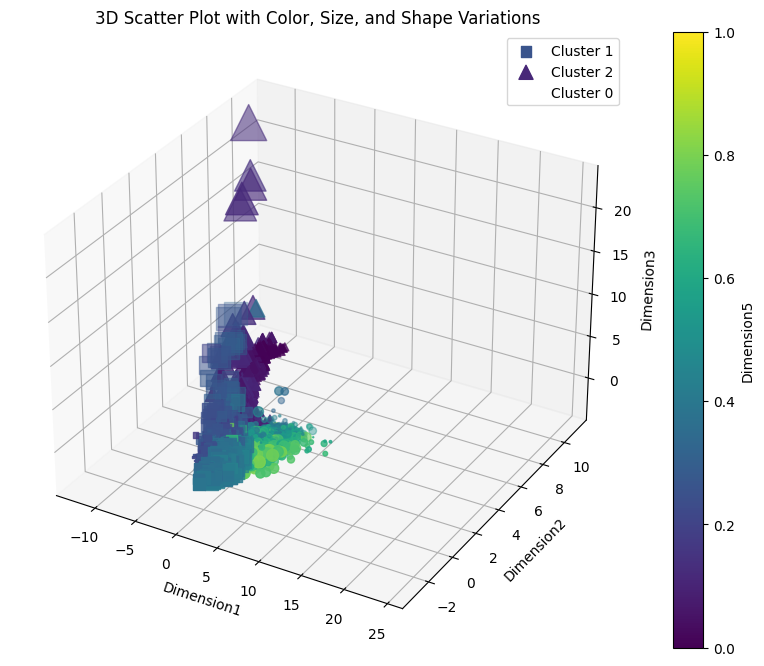

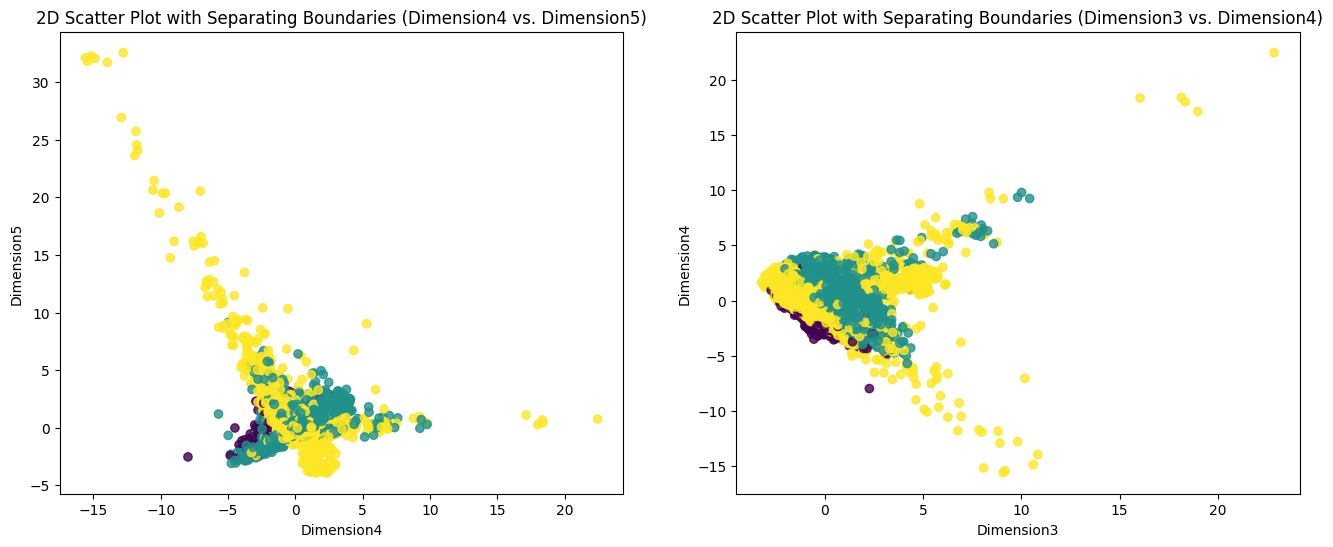

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 5 components
pca = PCA(n_components=5)
df_pca = pd.DataFrame(pca.fit_transform(df), columns=['Dimension1', 'Dimension2', 'Dimension3', 'Dimension4', 'Dimension5'])

# Apply k-means clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['Dimension1', 'Dimension2', 'Dimension3', 'Dimension4', 'Dimension5']])

# Plot 3D scatter plot with color, size, and shape variations
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Dimension1'], cluster_data['Dimension2'], cluster_data['Dimension3'],
               s=cluster_data['Dimension4'] * 30,  # Size variation based on Dimension4
               c=cluster_data['Dimension5'],  # Color variation based on Dimension5
               marker='o' if cluster_id == 0 else 's' if cluster_id == 1 else '^',  # Shape variation based on Cluster
               label=f'Cluster {cluster_id}')

ax.set_xlabel('Dimension1')
ax.set_ylabel('Dimension2')
ax.set_zlabel('Dimension3')
ax.set_title('3D Scatter Plot with Color, Size, and Shape Variations')

# Add a colorbar
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='viridis'))
cbar.set_label('Dimension5')

# Add a legend
ax.legend()

# Plot the 2D scatter plot with separating boundaries
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Dimension4 vs. Dimension5
ax[0].scatter(df_pca['Dimension4'], df_pca['Dimension5'], c=df_pca['Cluster'], cmap='viridis', alpha=0.8)
ax[0].set_xlabel('Dimension4')
ax[0].set_ylabel('Dimension5')
ax[0].set_title('2D Scatter Plot with Separating Boundaries (Dimension4 vs. Dimension5)')

# Dimension3 vs. Dimension4
ax[1].scatter(df_pca['Dimension3'], df_pca['Dimension4'], c=df_pca['Cluster'], cmap='viridis', alpha=0.8)
ax[1].set_xlabel('Dimension3')
ax[1].set_ylabel('Dimension4')
ax[1].set_title('2D Scatter Plot with Separating Boundaries (Dimension3 vs. Dimension4)')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


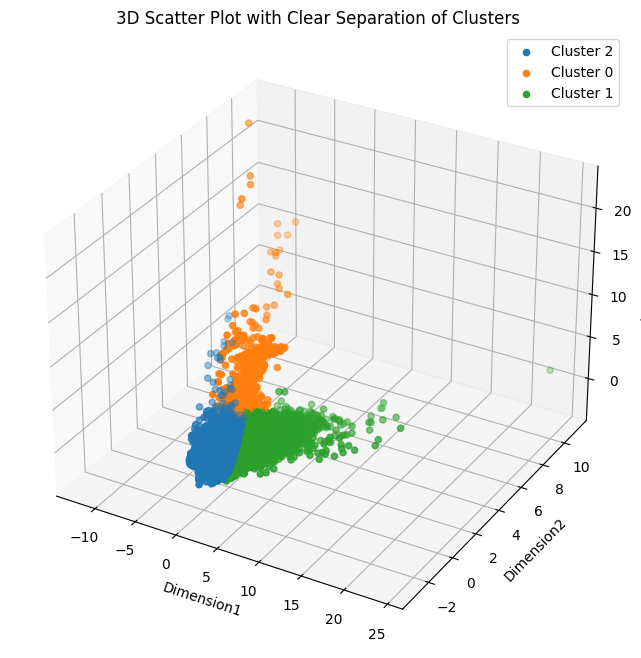

In [13]:
# Apply PCA to reduce dimensionality to 5 components
pca = PCA(n_components=3)
df_pca_new = pd.DataFrame(pca.fit_transform(df), columns=['Dimension1', 'Dimension2', 'Dimension3'])

# Apply k-means clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
df_pca_new['Cluster'] = kmeans.fit_predict(df_pca_new[['Dimension1', 'Dimension2', 'Dimension3']])

# Plot 3D scatter plot with clear separation of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in df_pca_new['Cluster'].unique():
    cluster_data = df_pca_new[df_pca_new['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Dimension1'], cluster_data['Dimension2'], cluster_data['Dimension3'],
               label=f'Cluster {cluster_id}')

ax.set_xlabel('Dimension1')
ax.set_ylabel('Dimension2')
ax.set_zlabel('Dimension3')
ax.set_title('3D Scatter Plot with Clear Separation of Clusters')

# Add a legend
ax.legend()

plt.show()


In [14]:
# Calculate mean values for each feature within each cluster
mean_values = df.groupby('Cluster').mean().reset_index()


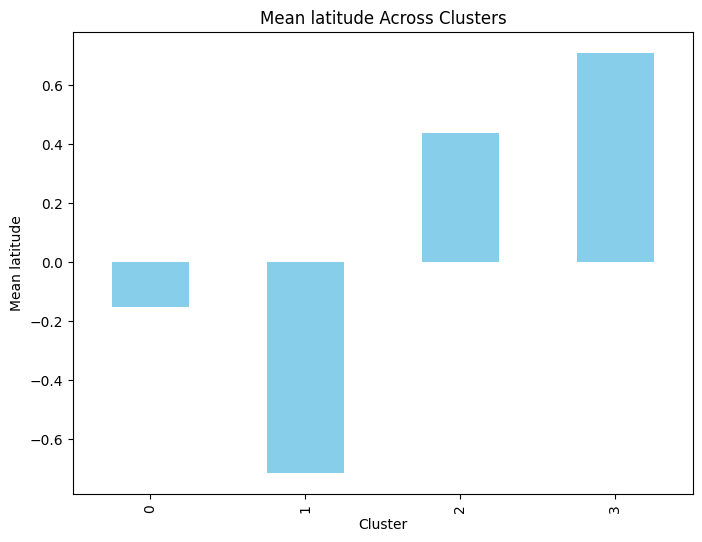

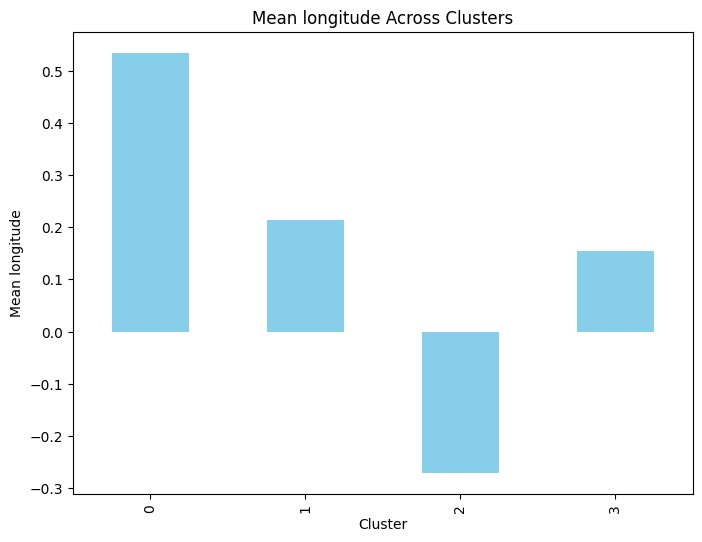

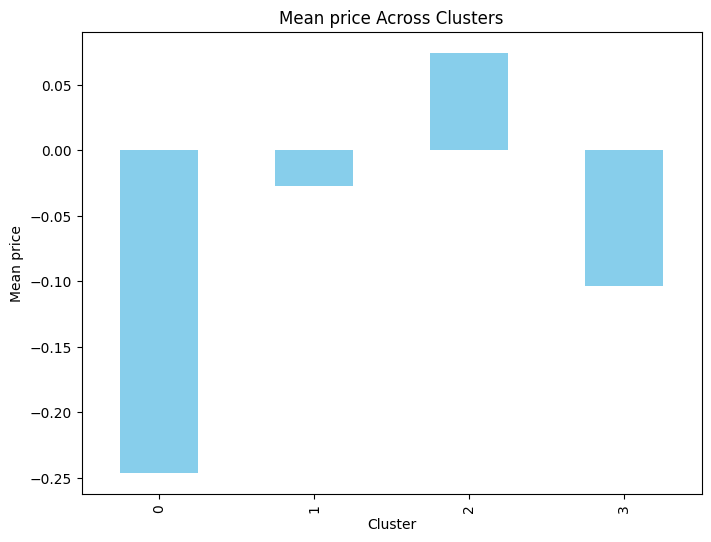

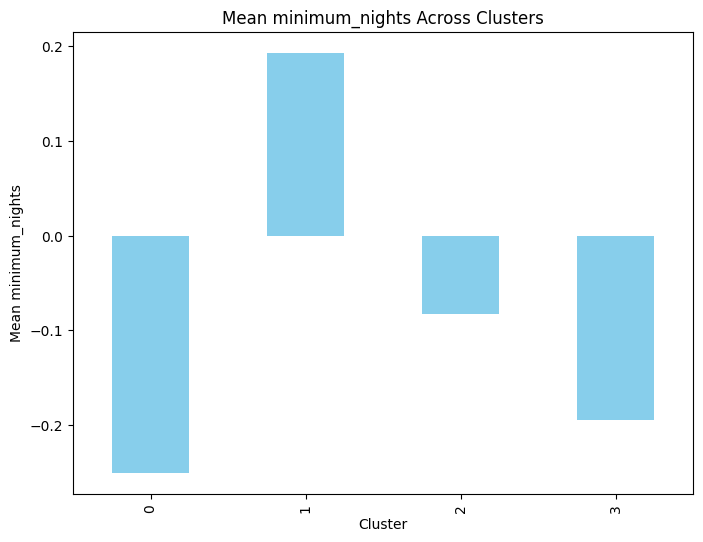

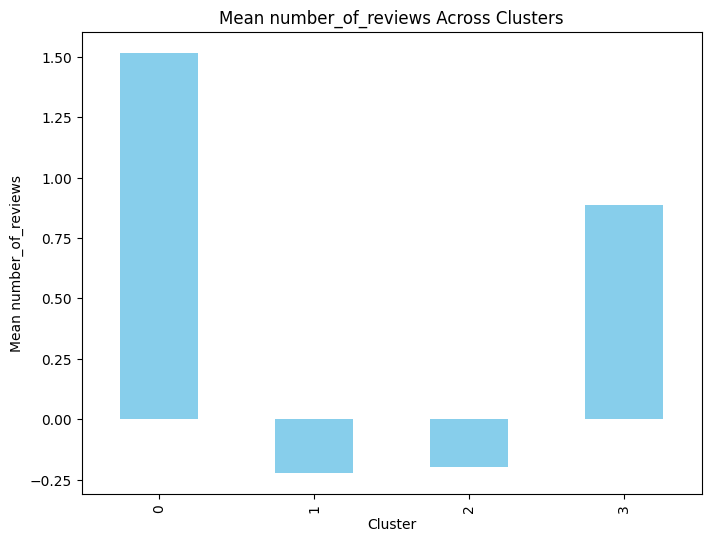

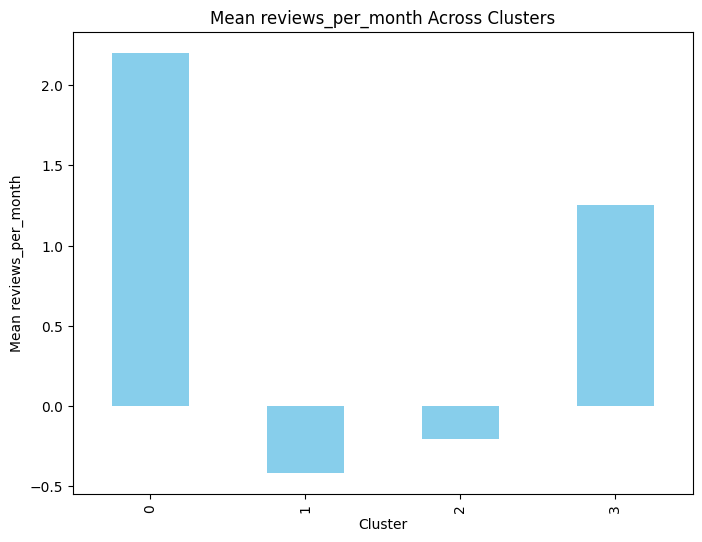

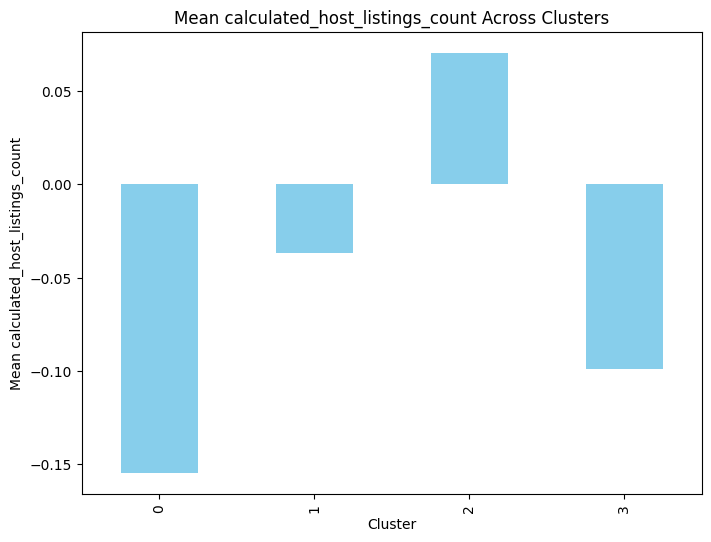

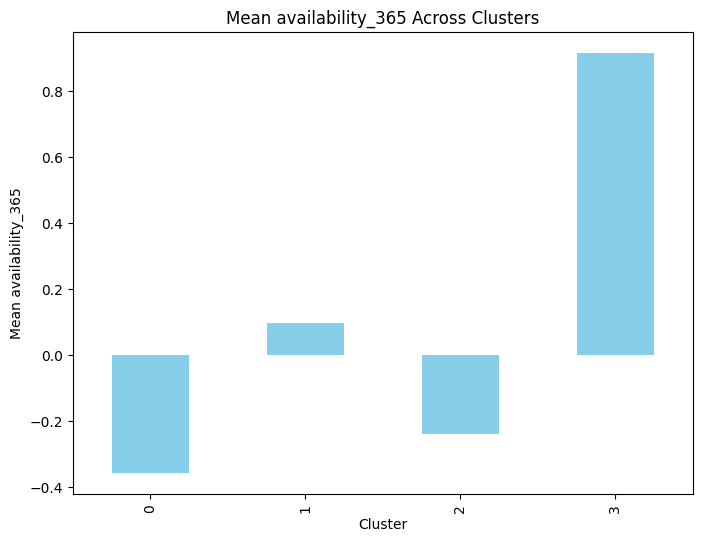

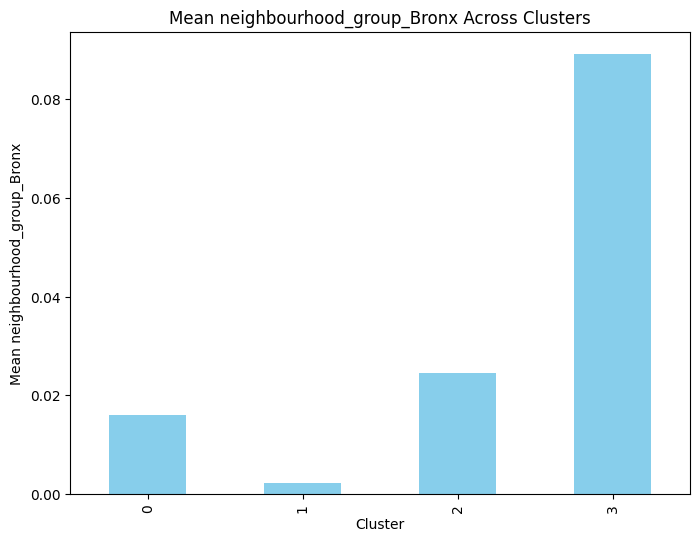

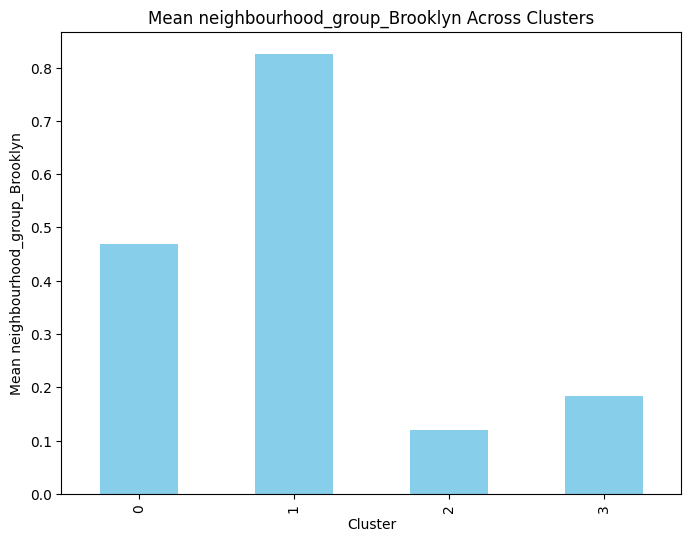

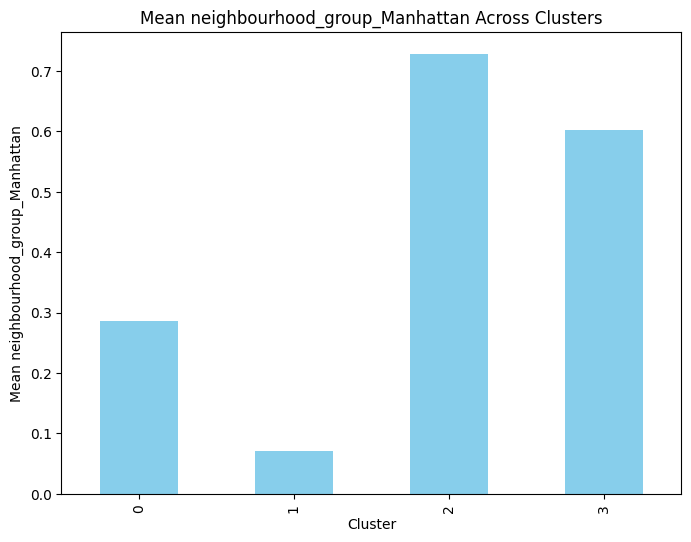

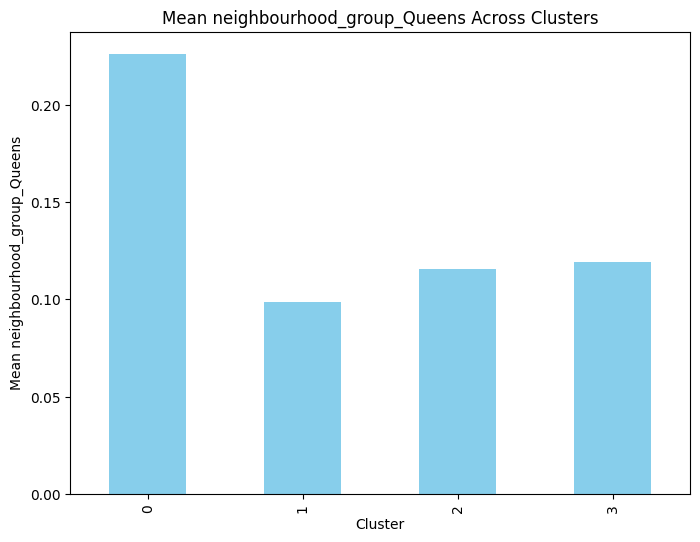

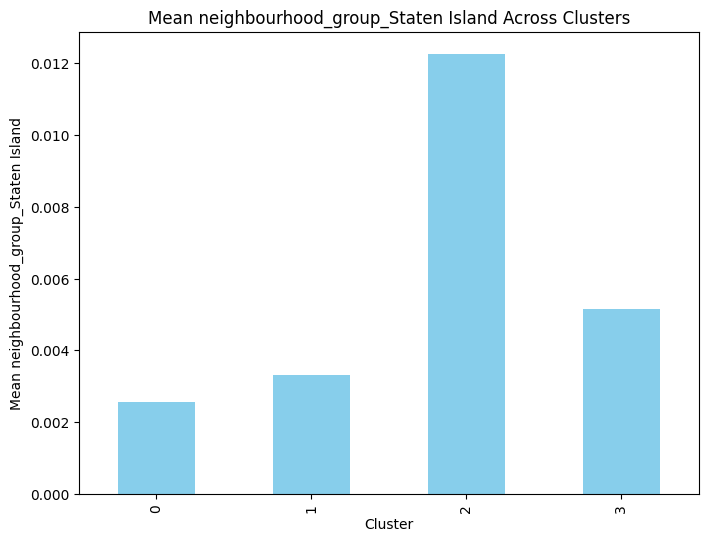

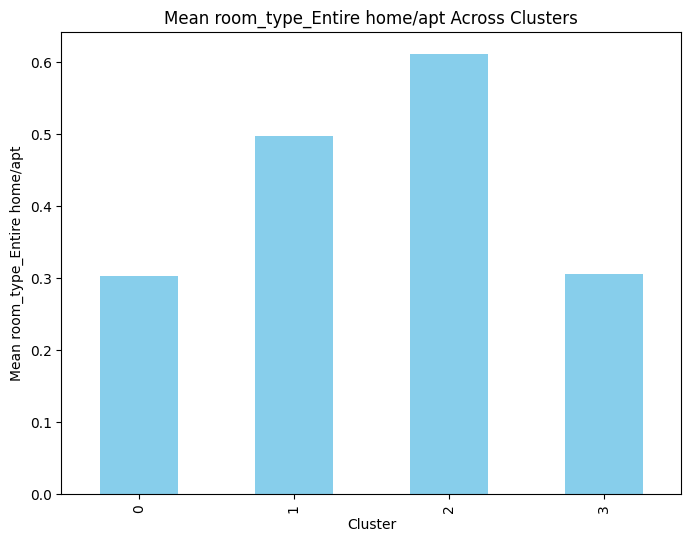

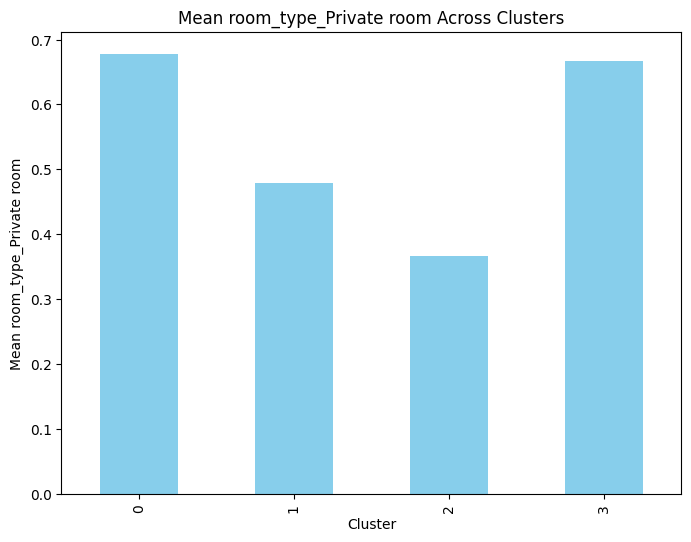

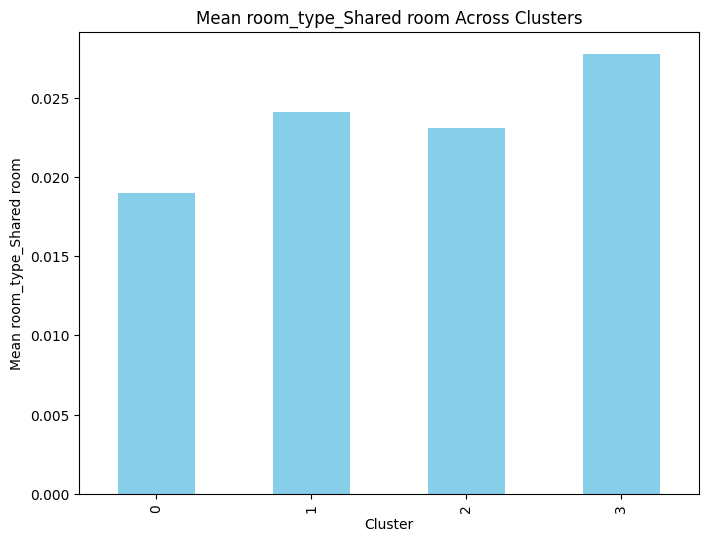

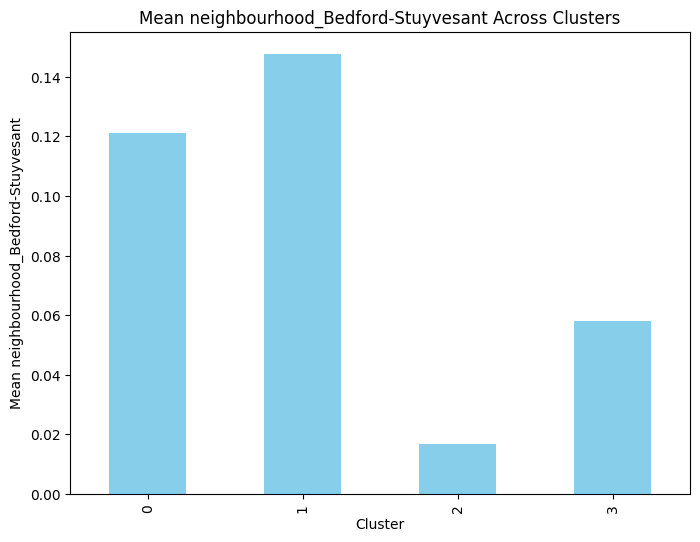

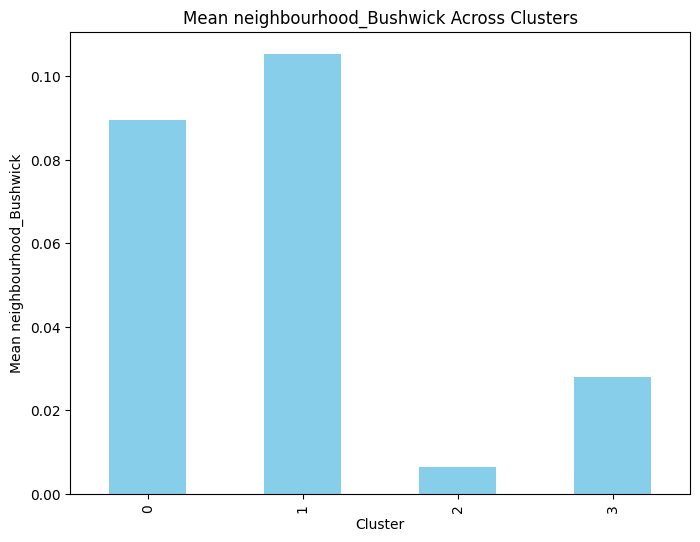

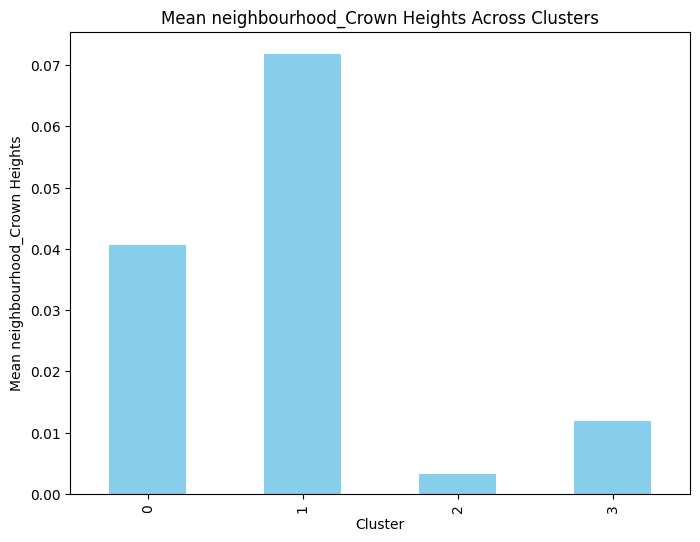

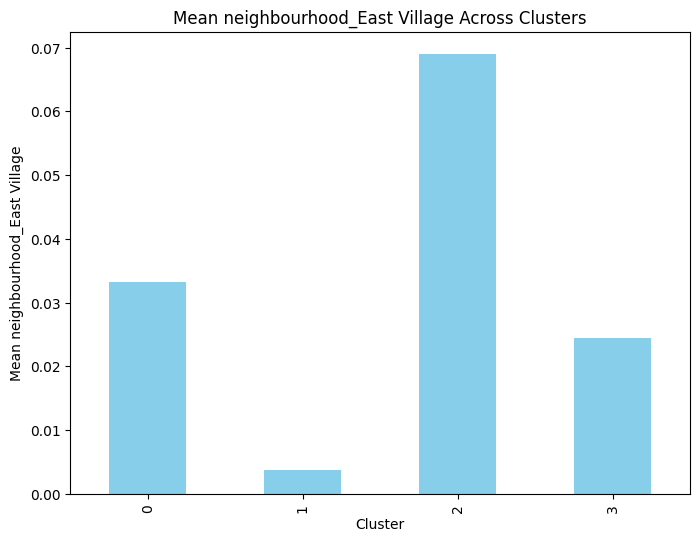

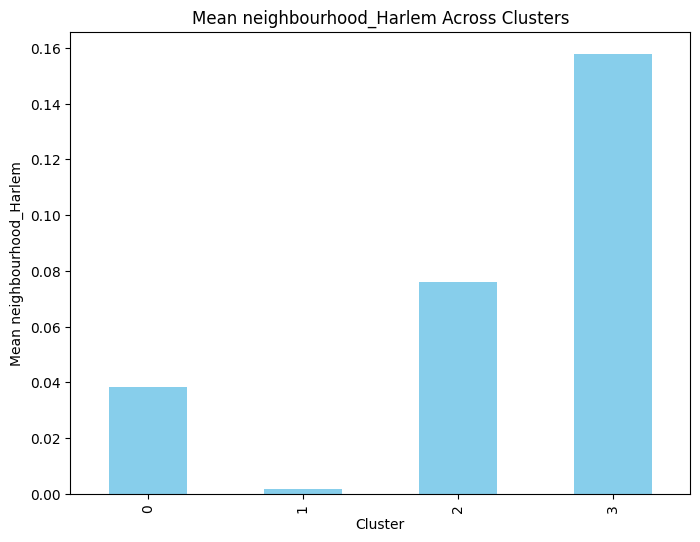

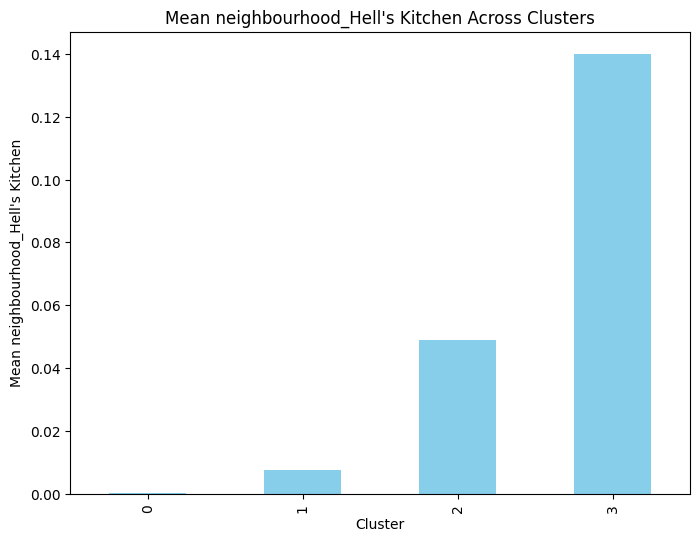

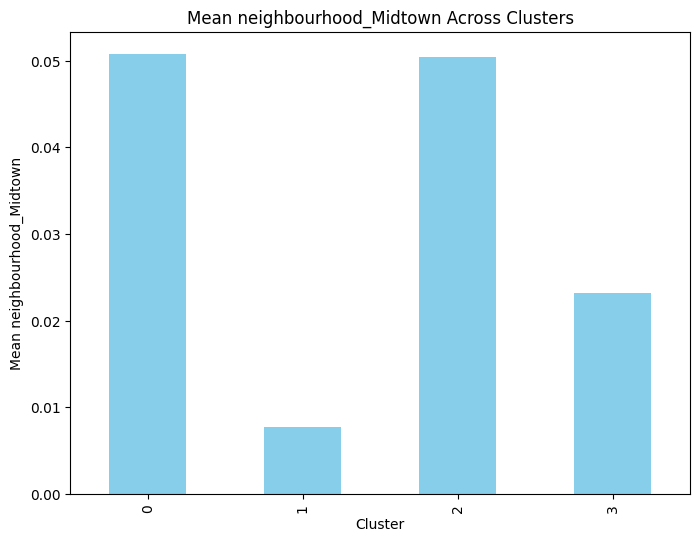

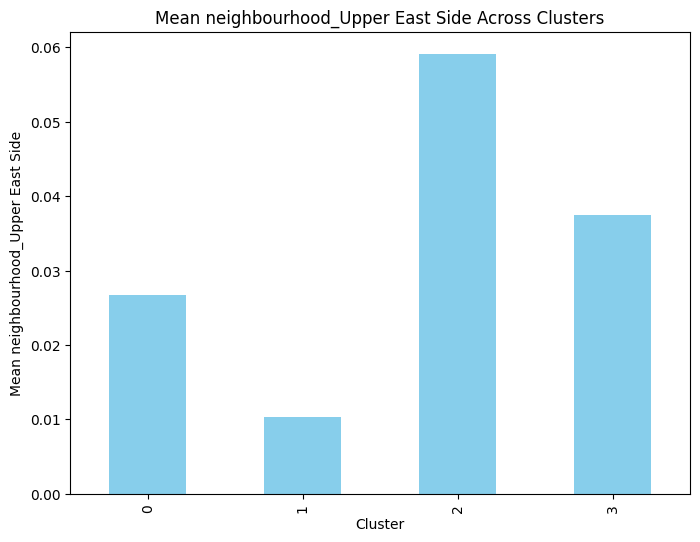

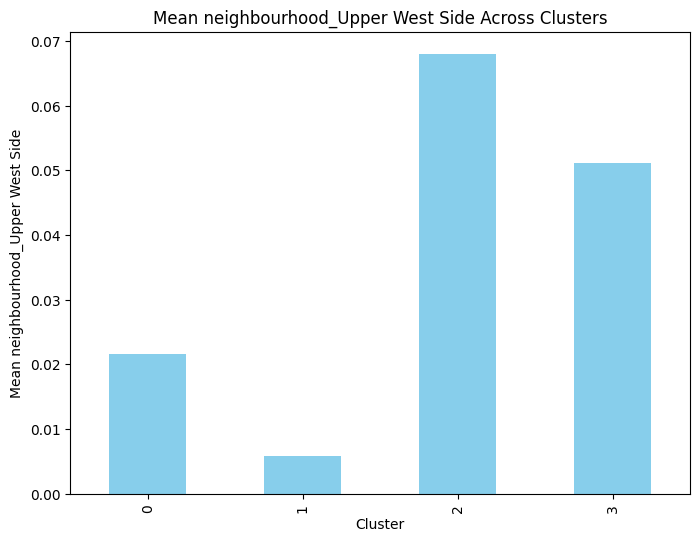

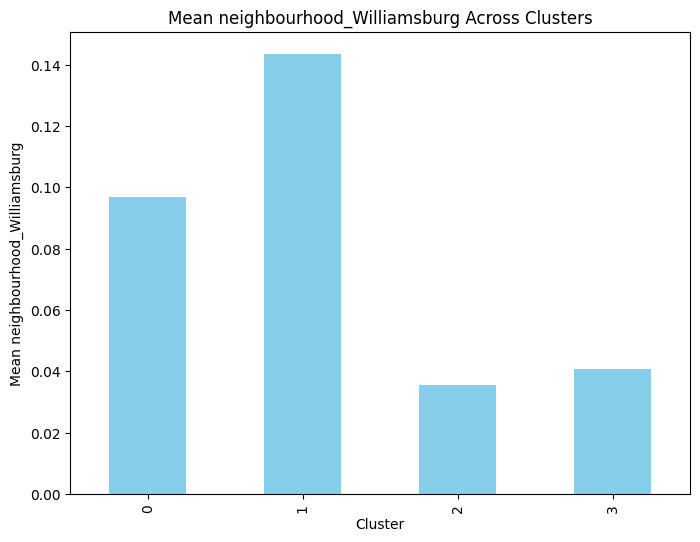

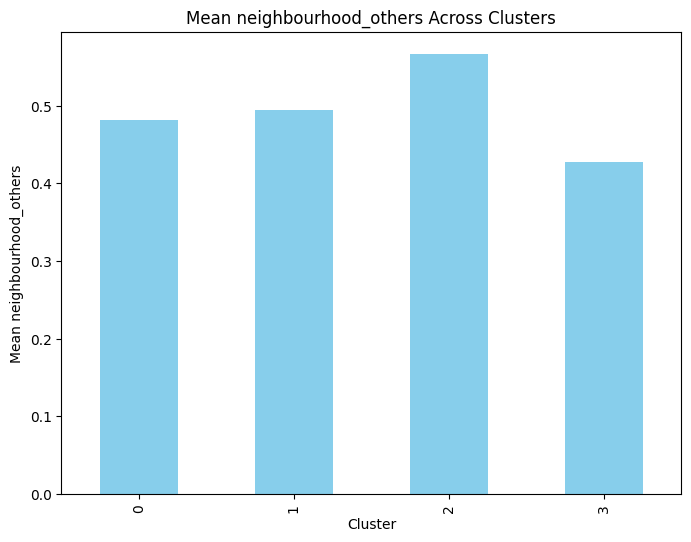

In [15]:

# Visualize mean values for each feature across clusters
for feature in df.columns[:-1]:  # Exclude 'Cluster' column
    plt.figure(figsize=(8, 6))
    mean_values[feature].plot(kind='bar', color='skyblue')
    plt.title(f'Mean {feature} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.show()


<ipython-input-16-f8bc11556f07>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_values, x='Cluster', y='latitude', hue='Cluster', ci=None)


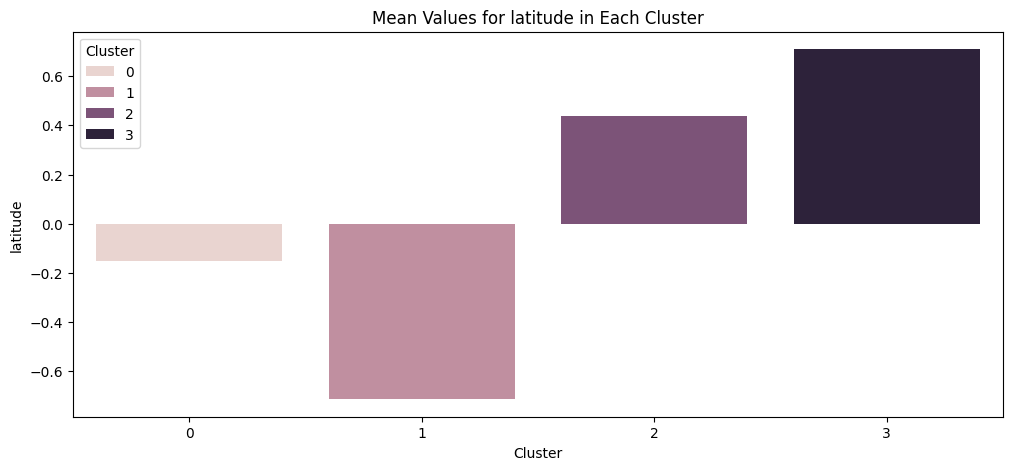

In [16]:

import seaborn as sns

# Bar chart
plt.figure(figsize=(12, 5))
sns.barplot(data=mean_values, x='Cluster', y='latitude', hue='Cluster', ci=None)
plt.title('Mean Values for latitude in Each Cluster')
plt.show()


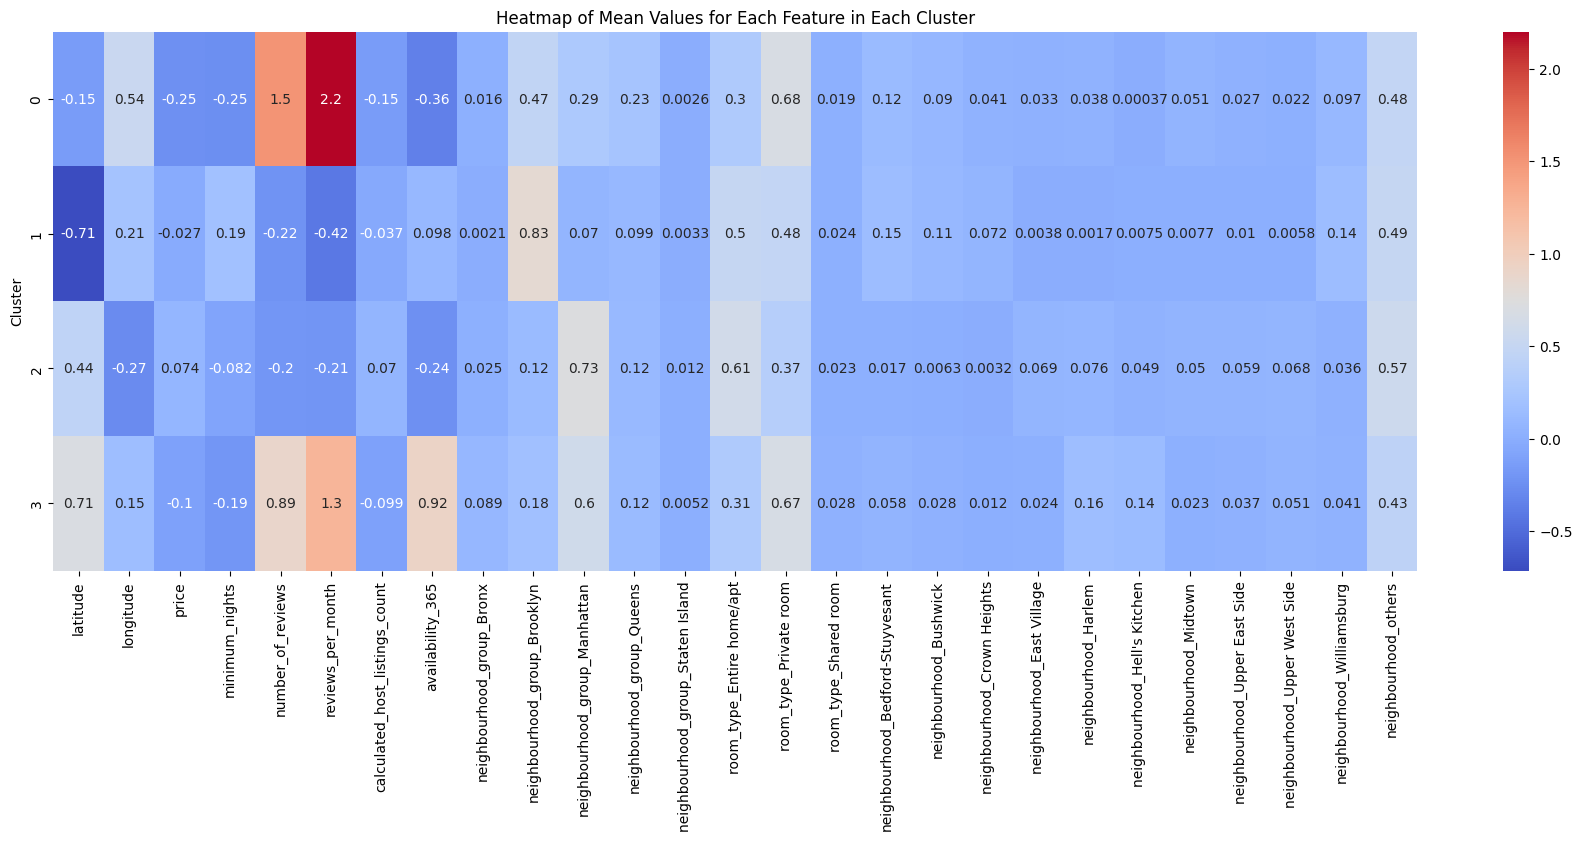

In [17]:

# Heatmap
plt.figure(figsize=(22, 7))
sns.heatmap(mean_values.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Values for Each Feature in Each Cluster')
plt.show()


EVERYTIME I RESTART THE TERMINAL, DIFFERENT MAP AND BAR PLOT IS SHOWN AS INITIAL POINTS ARE CHOOSEN AT RANDOM WHILE CLUSTERING

<ipython-input-18-6b66c040789d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=mean_values, x='Cluster', y='reviews_per_month', hue='Cluster', ci=None)


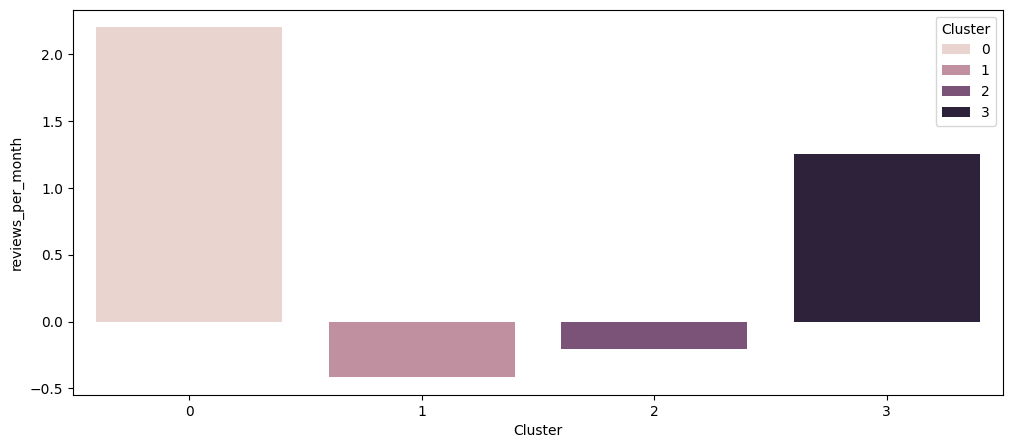

In [18]:
# Bar chart
plt.figure(figsize=(12, 5))
sns.barplot(data=mean_values, x='Cluster', y='reviews_per_month', hue='Cluster', ci=None)
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
clusters=df["Cluster"]
df = df.drop("Cluster", axis = 1)
# Assuming 'X' is your data and 'cluster_labels' are the cluster assignments
silhouette_avg = silhouette_score(df,clusters)
print(f"Silhouette Score: {silhouette_avg}")
# df

Silhouette Score: 0.10205446631522673


THE Silhouette Score DEPENDS ON MANY FACTORS ,THERE IS SOME OVERLAPPING IN THE CLUSTERS.WITH BETTER DOMAIN KNOWLEDGE AND SKILLS THIS CAN BE IMPROVED


A CLUSTER OF 4 IS TAKEN AS IT IS THE ONE WHERE IS DOESNT OVERFIT THE DATA(LOW BIAS),OR UNDERFIT THE DATA(HIGH BIAS)